In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Hough Transform with OpenCV

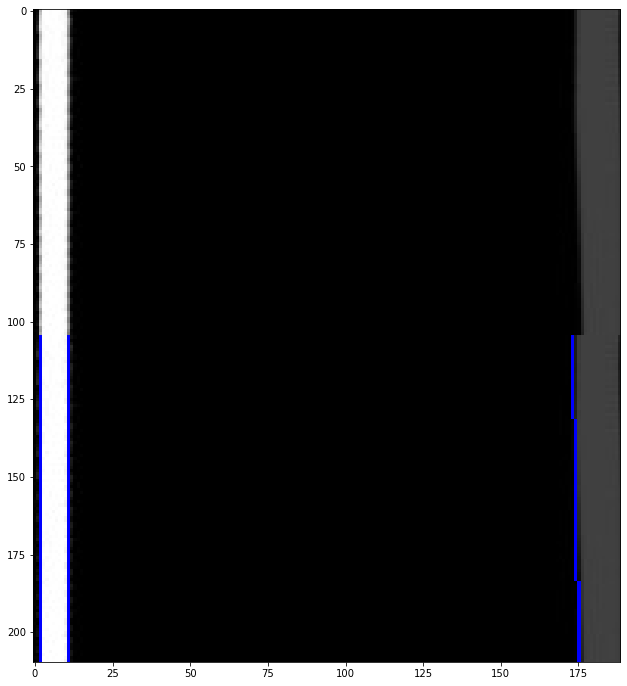

In [47]:
img = cv2.imread('src/straight.jpg')
img_original = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,0,120,apertureSize=3)

lines = cv2.HoughLines(edges,1,np.pi/180,76)

for i in range(len(lines)):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0+1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 -1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),1)

res = np.vstack((img_original,img))
plt.figure(figsize = (20,12))
plt.imshow(res)


# 확률 Hough Transform

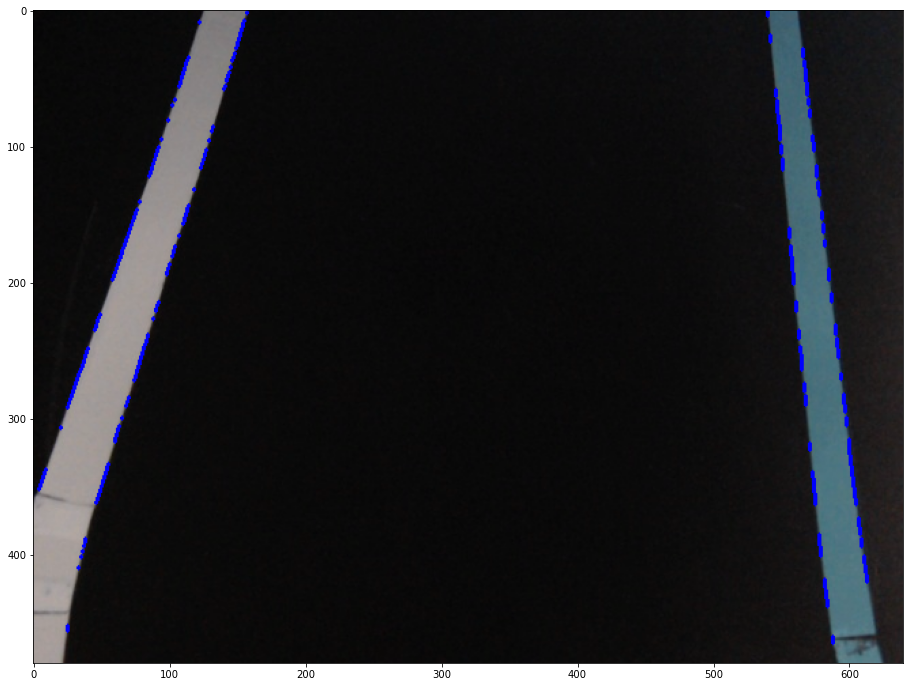

In [85]:
img = cv2.imread('src/line.jpg')
edges = cv2.Canny(img,50,200,apertureSize = 3)
gray = cv2.cvtColor(edges,cv2.COLOR_GRAY2BGR)
minLineLength = 0
maxLineGap = 0

lines = cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength,maxLineGap)
for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
plt.figure(figsize=(20,12))
plt.imshow(img)